# Ï∫êÍ∏Ä ÏßëÍ∞í ÏòàÏ∏°ÌïòÍ∏∞

## Ï∞∏Í≥†Ìï† Data fields   
ID : ÏßëÏùÑ Íµ¨Î∂ÑÌïòÎäî Î≤àÌò∏   
date : ÏßëÏùÑ Íµ¨Îß§Ìïú ÎÇ†Ïßú   
price : ÏßëÏùò Í∞ÄÍ≤©(Target variable)   
bedrooms : Ïπ®Ïã§Ïùò Ïàò   
bathrooms : ÌôîÏû•Ïã§Ïùò Ïàò   
sqft_living : Ï£ºÍ±∞ Í≥µÍ∞ÑÏùò ÌèâÎ∞© ÌîºÌä∏(Î©¥Ï†Å)   
sqft_lot : Î∂ÄÏßÄÏùò ÌèâÎ∞© ÌîºÌä∏(Î©¥Ï†Å)   
floors : ÏßëÏùò Ï∏µ Ïàò   
waterfront : ÏßëÏùò Ï†ÑÎ∞©Ïóê Í∞ïÏù¥ ÌùêÎ•¥ÎäîÏßÄ Ïú†Î¨¥ (a.k.a. Î¶¨Î≤ÑÎ∑∞)   
view : ÏßëÏù¥ ÏñºÎßàÎÇò Ï¢ãÏïÑ Î≥¥Ïù¥ÎäîÏßÄÏùò Ï†ïÎèÑ   
condition : ÏßëÏùò Ï†ÑÎ∞òÏ†ÅÏù∏ ÏÉÅÌÉú   
grade : King County grading ÏãúÏä§ÌÖú Í∏∞Ï§ÄÏúºÎ°ú Îß§Í∏¥ ÏßëÏùò Îì±Í∏â   
sqft_above : ÏßÄÌïòÏã§ÏùÑ Ï†úÏô∏Ìïú ÌèâÎ∞© ÌîºÌä∏(Î©¥Ï†Å)   
sqft_basement : ÏßÄÌïòÏã§Ïùò ÌèâÎ∞© ÌîºÌä∏(Î©¥Ï†Å)   
yr_built : ÏßÄÏñ¥ÏßÑ ÎÖÑÎèÑ   
yr_renovated : ÏßëÏùÑ Ïû¨Í±¥Ï∂ïÌïú ÎÖÑÎèÑ   
zipcode : Ïö∞Ìé∏Î≤àÌò∏   
lat : ÏúÑÎèÑ   
long : Í≤ΩÎèÑ   
sqft_living15 : 2015ÎÖÑ Í∏∞Ï§Ä Ï£ºÍ±∞ Í≥µÍ∞ÑÏùò ÌèâÎ∞© ÌîºÌä∏(Î©¥Ï†Å, ÏßëÏùÑ Ïû¨Í±¥Ï∂ïÌñàÎã§Î©¥, Î≥ÄÌôîÍ∞Ä ÏûàÏùÑ Ïàò ÏûàÏùå)   
sqft_lot15 : 2015ÎÖÑ Í∏∞Ï§Ä Î∂ÄÏßÄÏùò ÌèâÎ∞© ÌîºÌä∏(Î©¥Ï†Å, ÏßëÏùÑ Ïû¨Í±¥Ï∂ïÌñàÎã§Î©¥, Î≥ÄÌôîÍ∞Ä ÏûàÏùÑ Ïàò ÏûàÏùå)   

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
from os.path import join
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
data_dir = os.getenv('HOME')+'/aiffel/AI_study/Exploration/E05_kaggle_house_price_prediction/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

data = pd.read_csv(train_data_path)
sub = pd.read_csv(test_data_path)

print(train_data_path)
print(test_data_path)
print(data.shape)
print(sub.shape)

/aiffel/aiffel/AI_study/Exploration/E05_kaggle_house_price_prediction/data/train.csv
/aiffel/aiffel/AI_study/Exploration/E05_kaggle_house_price_prediction/data/test.csv
(15035, 21)
(6468, 20)


# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

In [4]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6468 non-null   int64  
 1   date           6468 non-null   object 
 2   bedrooms       6468 non-null   int64  
 3   bathrooms      6468 non-null   float64
 4   sqft_living    6468 non-null   int64  
 5   sqft_lot       6468 non-null   int64  
 6   floors         6468 non-null   float64
 7   waterfront     6468 non-null   int64  
 8   view           6468 non-null   int64  
 9   condition      6468 non-null   int64  
 10  grade          6468 non-null   int64  
 11  sqft_above     6468 non-null   int64  
 12  sqft_basement  6468 non-null   int64  
 13  yr_built       6468 non-null   int64  
 14  yr_renovated   6468 non-null   int64  
 15  zipcode        6468 non-null   int64  
 16  lat            6468 non-null   float64
 17  long           6468 non-null   float64
 18  sqft_liv

subÎäî ÎãπÏó∞ÌïòÍ≤åÎèÑ price Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÎã§. Îî∞Î°ú Ï†ÄÏû•Ìï¥ÎëêÍ≥† Ï†ÑÏ≤òÎ¶¨ ÏûëÏóÖ ÏßÑÌñâÌïòÍ∏∞ ÏúÑÌï¥ Ìï©Ï≥êÏ£ºÏûê

In [5]:
# dataÏùò priceÎ•º y Î≥ÄÏàòÏóê ÎëêÍ≥† price column ÏÇ≠Ï†ú
y = data['price']

del data['price']

# trainÍ≥º sub data Ìï©ÏπòÍ∏∞
# ÎÇòÏ§ëÏóê train dataÎßå Îî∞Î°ú Î∂ÄÎ•¥Í∏∞ ÏúÑÌï¥ lengthÎ•º Ï∂îÏ∂úÌï¥ÎíÄÎã§
train_len = len(data)
data = pd.concat((data, sub), axis=0)

print(len(data))

21503


In [6]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏
for c in data.columns:
    print('{} : {}'.format(c, len(data.loc[pd.isnull(data[c]), c].values)))

id : 0
date : 0
bedrooms : 0
bathrooms : 0
sqft_living : 0
sqft_lot : 0
floors : 0
waterfront : 0
view : 0
condition : 0
grade : 0
sqft_above : 0
sqft_basement : 0
yr_built : 0
yr_renovated : 0
zipcode : 0
lat : 0
long : 0
sqft_living15 : 0
sqft_lot15 : 0


In [7]:
data.head()

id             date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0   0  20141013T000000         3       1.00         1180      5650     1.0   
1   1  20150225T000000         2       1.00          770     10000     1.0   
2   2  20150218T000000         3       2.00         1680      8080     1.0   
3   3  20140627T000000         3       2.25         1715      6819     2.0   
4   4  20150115T000000         3       1.50         1060      9711     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      6         770              0      1933   
2           0     0          3      8        1680              0      1987   
3           0     0          3      7        1715              0      1995   
4           0     0          3      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711

In [8]:
# id Ï†ïÎ¶¨ÏôÄ data ÍπîÎÅîÌïòÍ≤å ÎßåÎì§Í∏∞
sub_id = data['id'][train_len:]
del data['id']

data['date'] = data['date'].apply(lambda x : str(x[:6])).astype(int)

In [9]:
data.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  201410         3       1.00         1180      5650     1.0           0   
1  201502         2       1.00          770     10000     1.0           0   
2  201502         3       2.00         1680      8080     1.0           0   
3  201406         3       2.25         1715      6819     2.0           0   
4  201501         3       1.50         1060      9711     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      6         770              0      1933             0   
2     0          3      8        1680              0      1987             0   
3     0          3      7        1715              0      1995             0   
4     0          3      7        1060              0      1963             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98028  47.7379 -122.233           2720        8062  
2    98074  47.6168 -122.045           1800        7503  
3    98003  47.3097 -122.327           2238        6819  
4    98198  47.4095 -122.315           1650        9711

### Î≥ÄÏàòÎì§ Î∂ÑÌè¨ÎèÑ ÌôïÏù∏ ÌõÑ Ï†ïÍ∑úÌôî

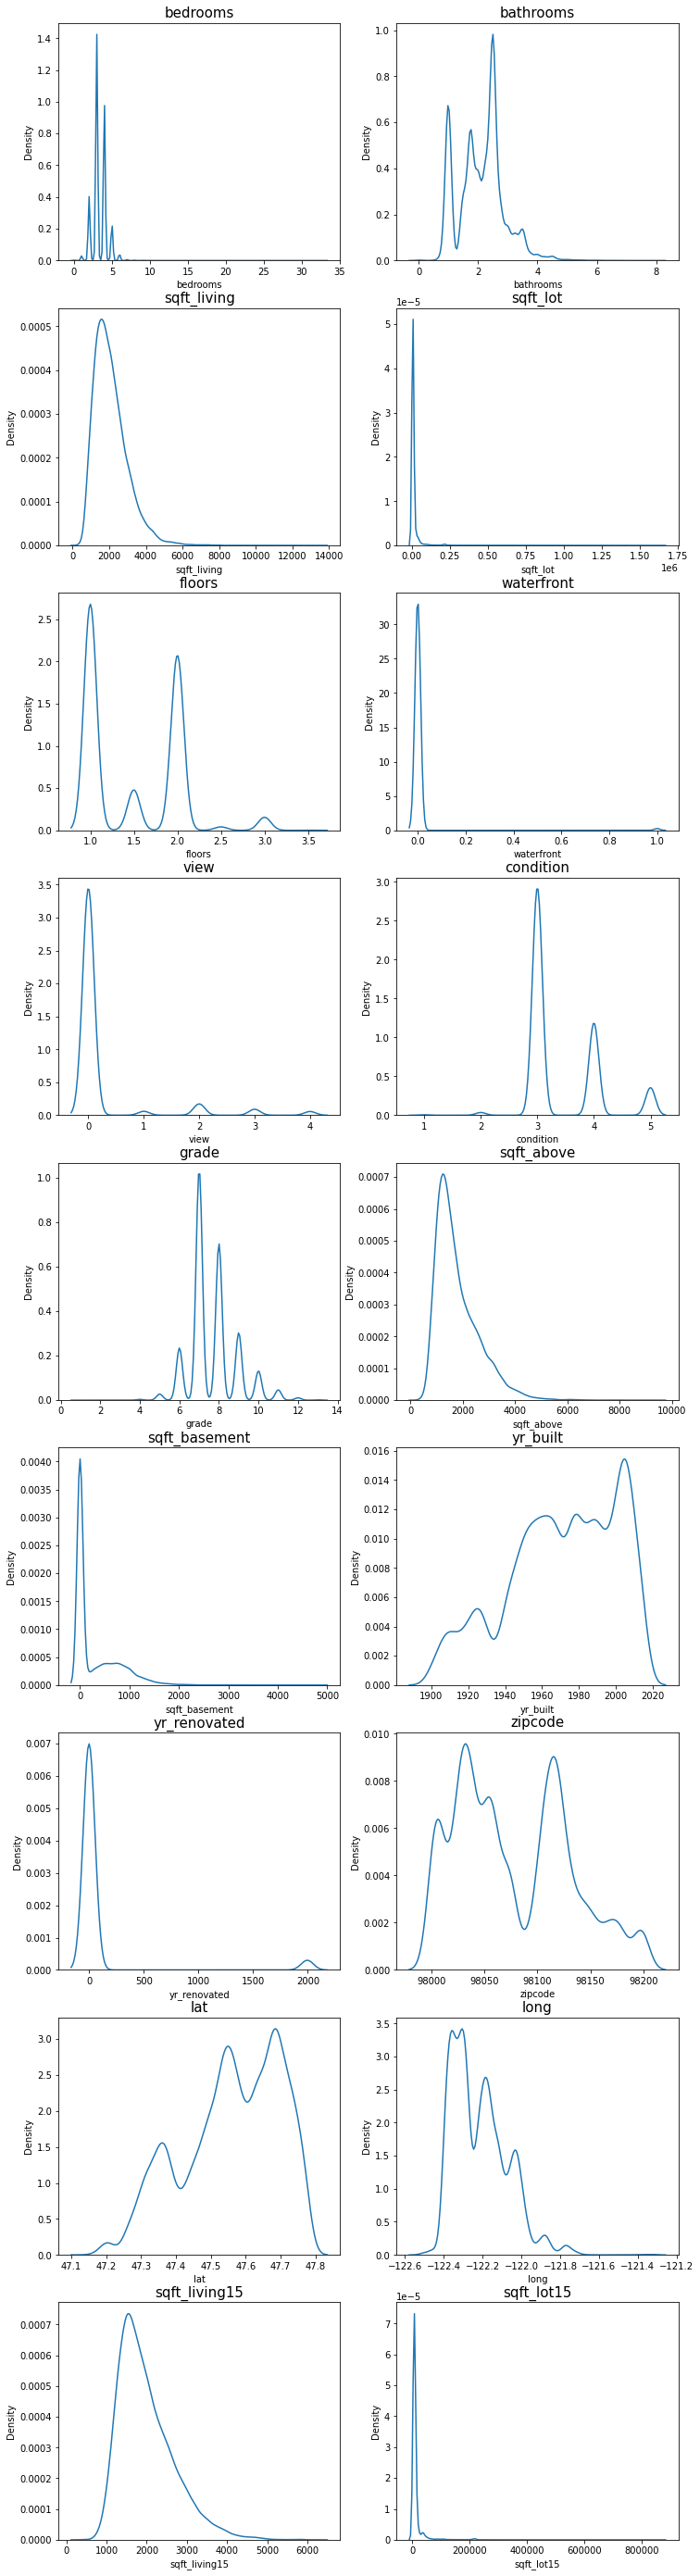

In [10]:
fig, ax = plt.subplots(9, 2, figsize=(12, 50))

count = 1
columns = data.columns
for row in range(9):
    for col in range(2):
        sns.kdeplot(data=data[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break

In [11]:
# Í∑∏ÎûòÌîÑÍ∞Ä ÌïúÏ™ΩÏúºÎ°ú ÏπòÏö∞Ïπú Î≥ÄÏàòÎì§ÏùÑ np.log1p()Î•º ÌÜµÌï¥ Ï†ïÍ∑úÎ∂ÑÌè¨Ïóê Í∑ºÏ†ëÌïòÍ≤å ÎßåÎì§Í∏∞.
skew_columns = [
    'bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15'
]

for c in skew_columns:
    data[c] = np.log1p(data[c].values)

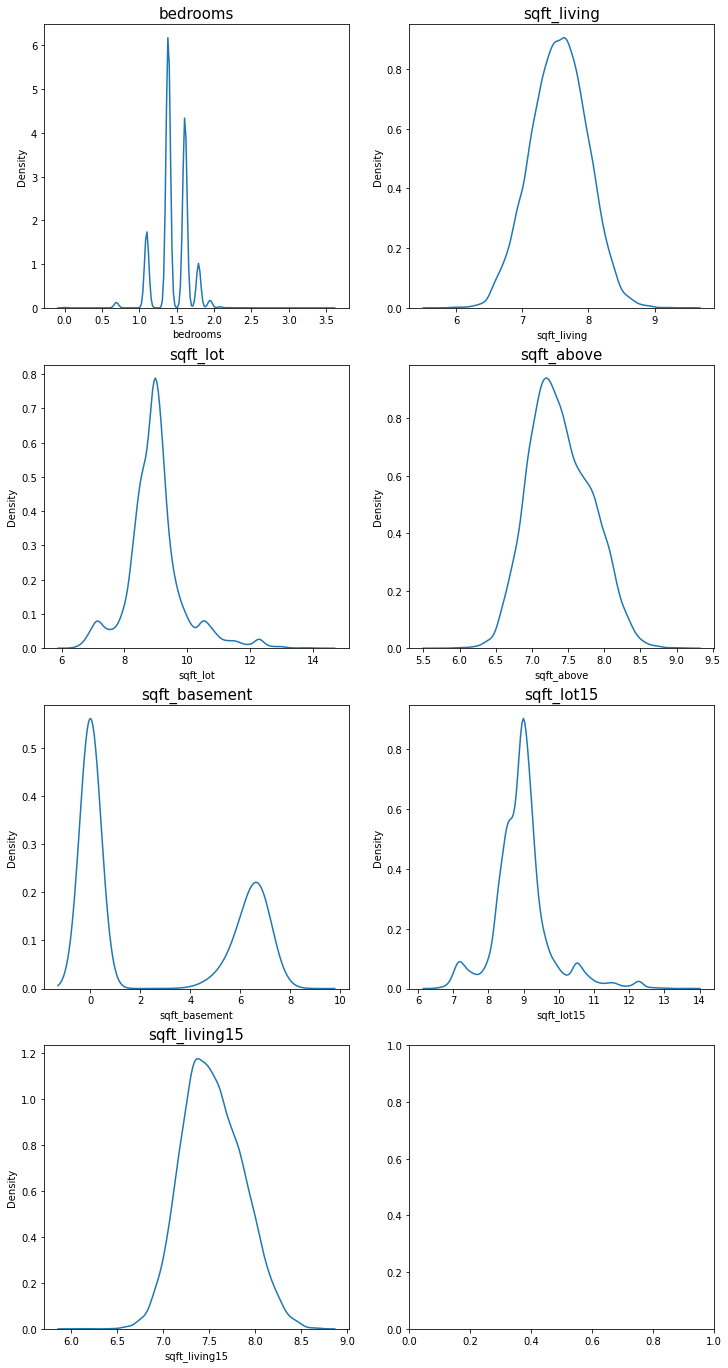

In [12]:
fig, ax = plt.subplots(4, 2, figsize=(12, 24))

count = 0
for row in range(4):
    for col in range(2):
        if count == 7:
            break
        sns.kdeplot(data=data[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count += 1

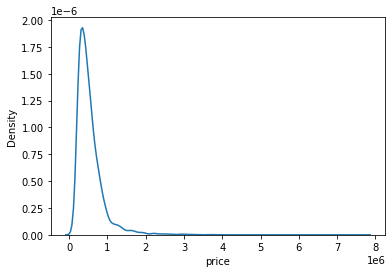

In [13]:
# yÏùò Î∂ÑÌè¨ÎèÑ ÌôïÏù∏ÌïòÍ∏∞
sns.kdeplot(y)
plt.show()

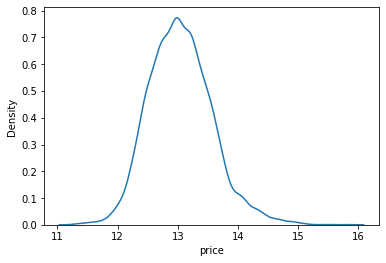

In [14]:
# Î°úÍ∑∏ ÏÇ¨Ïö©Ìï¥ÏÑú Ïû¨Ï†ïÏùòÌïòÍ∏∞
y = np.log1p(y)
sns.kdeplot(y)
plt.show()

In [15]:
# trainÍ≥º test Îã§Ïãú ÎÇòÎà†Ï£ºÍ∏∞
train = data.iloc[:train_len, :]
test = data.iloc[train_len:, :]

print(train.shape)
print(test.shape)
# trainÏùò targetÍ∞í y Ïù∏ÏßÄÌïòÍ∏∞
print(y)

(15035, 19)
(6468, 19)
0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64


# Î™®Îç∏ÎßÅ

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [17]:
# ÎÇòÏ§ëÏóê y_test, y_predÏóê Ï†ÅÏö©Ìïú np.log1p()Î•º ÎêòÎèåÎ¶¨Í∏∞ ÏúÑÌï¥ np.expm1() ÏÇ¨Ïö©
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

In [18]:
# lgbm ÏÇ¨Ïö©Ìï¥ÏÑú ÌïôÏäµÌïòÍ∏∞
random_state = 15

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

print('ok')

ok


In [19]:
def get_scores(models, train, y):
    df = {}

    for model in models:
        model_name = model.__class__.__name__
        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
        model.fit(X_train, y_train)

        # ÏòàÏ∏°
        y_pred = model.predict(X_test)

        # ÏòàÏ∏° Í≤∞Í≥ºÏùò rmseÍ∞í Ï†ÄÏû•
        df[model_name] = rmse(y_test, y_pred)

        # data frameÏóê Ï†ÄÏû•
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)

    return score_df

get_scores(models, train, y)

RMSE
GradientBoostingRegressor  133548.728652
RandomForestRegressor      131013.289475
XGBRegressor               124251.755245
LGBMRegressor              112626.145448

# GridSearchÏôÄ Ïó¨Îü¨ Î™®Îç∏Ïóê ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ Ï∂îÍ∞ÄÌïòÍ∏∞

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=-1):
    # model Ï¥àÍ∏∞Ìôî
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                        cv=5, verbose=verbose, n_jobs=n_jobs)
    
    # fitting
    grid_model.fit(train, y)
    
    # params, score Í≤∞Í≥º Ï†ÄÏû•ÌïòÍ∏∞
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    # Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÎßåÎì§Í∏∞
    results = pd.DataFrame(params)
    results['score'] = score
    
    # RMSLE Í∞íÏùÑ Ï∂îÍ∞ÄÌïòÍ≥† Ï†ïÎ†¨
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')
    
    return results

In [22]:
# LGBMRegressor
lgb_params = {
    'n_estimators' : [400, 800],
    'learning_rate' : [0.1, 0.05],
    'max_depth' : [8, 10, 15, 20]
}

lightgbm = LGBMRegressor(random_state=random_state)

my_GridSearch(lightgbm, train, y, lgb_params)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


learning_rate  max_depth  n_estimators     score     RMSLE
11           0.05         10           800 -0.025903  0.160945
9            0.05          8           800 -0.025937  0.161050
13           0.05         15           800 -0.025941  0.161062
15           0.05         20           800 -0.026033  0.161347
10           0.05         10           400 -0.026036  0.161356
8            0.05          8           400 -0.026063  0.161441
12           0.05         15           400 -0.026088  0.161518
2            0.10         10           400 -0.026118  0.161609
14           0.05         20           400 -0.026157  0.161731
6            0.10         20           400 -0.026205  0.161881
4            0.10         15           400 -0.026319  0.162232
0            0.10          8           400 -0.026379  0.162416
3            0.10         10           800 -0.026550  0.162943
7            0.10         20           800 -0.026602  0.163102
5            0.10         15           800 -0.026749  0.163550
1            0.10          8           800 -0.026759  0.163583

In [23]:
# Ï†ÅÏö©Ìïú ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ Ï†ÅÌï©ÏÑ± Î∞è rmse Ï†êÏàò ÌôïÏù∏
check_lightgbm = LGBMRegressor(learning_rate=0.05, max_depth=10, n_estimators=800)

check_X_train, check_X_test, check_y_train, check_y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
check_lightgbm.fit(check_X_train, check_y_train)

print(check_lightgbm.score(check_X_train, check_y_train))
print(check_lightgbm.score(check_X_test, check_y_test))

y_pred = check_lightgbm.predict(check_X_test)
check_rmse = rmse(check_y_test, y_pred)
check_rmse

0.9678598743905049
0.9163458682443472


106043.222713269

### target score 110000 Ïù¥ÌïòÏù¥ÎØÄÎ°ú Ï†úÏ∂úÌïòÍ∏∞!!

# Ï†ÄÏû•

In [24]:
def save_submission(model, train, y, test, model_name, rmsle):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    data_dir = os.getenv('HOME')+'/aiffel/AI_study/Exploration/E05_kaggle_house_price_prediction/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('save{}'.format(submission_csv_path))

In [25]:
save_submission(check_lightgbm, train, y, test, model_name='lgbm', rmsle='0.160945')

save/aiffel/aiffel/AI_study/Exploration/E05_kaggle_house_price_prediction/data/submission_lgbm_RMSLE_0.160945.csv


# Í≤∞Í≥º
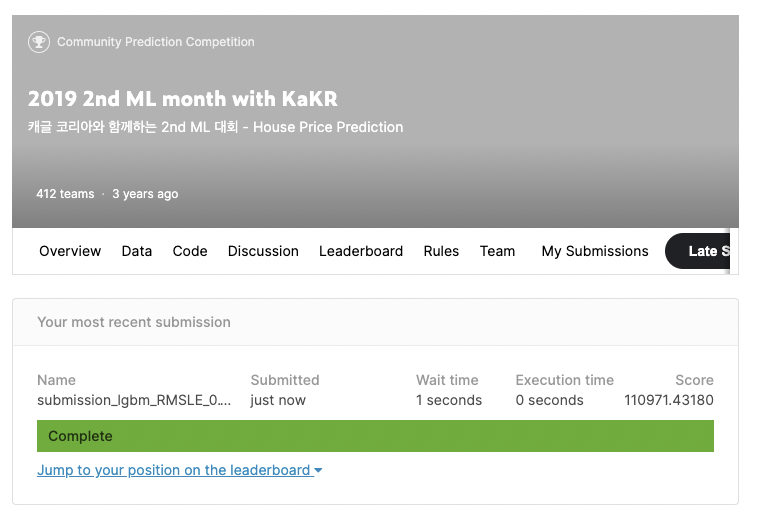   

ÏïΩ 1000Ï†ê overÎ°ú ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ Í∞íÏùÑ ÏÇ¥Ïßù Î∞îÍæº Îí§ Îã§Ïãú Ïû¨Ï∂úÌï¥ÏïºÌïúÎã§!!

---

# 1Ï∞® ÏàòÏ†ï_ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ï†ïÌïòÍ∏∞

ÏàòÏ†ï Ï†Ñ 23Î≤àÏß∏ ÏΩîÎìúÎ∏îÎü≠ Í≤∞Í≥ºÍ∞Ä
0.9678598743905049   
0.9163458682443472   
106043.222713269   
Ïù¥Î†áÍ≤å ÎÇòÏôîÎã§ Ïù¥Îäî Í≥ºÏÜåÏ†ÅÌï©Ïóê Ìï¥ÎãπÌïòÎØÄÎ°ú ÌõàÎ†®ÎüâÏùÑ ÎäòÎ¶¨Í∏∞ ÏúÑÌï¥ cvÎ•º 5ÏóêÏÑú 10ÏúºÎ°ú ÏàòÏ†ï   
Í∑∏Î¶¨Í≥† ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Ïóê num_leaves Ï∂îÍ∞ÄÌïòÍ≥† ÌååÎùºÎØ∏ÌÑ∞Ïùò Í∞ÄÏßÄÏàò Ï∂îÍ∞Ä

In [26]:
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=-1):
    # model Ï¥àÍ∏∞Ìôî
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                        cv=10, verbose=verbose, n_jobs=n_jobs)
    
    # fitting
    grid_model.fit(train, y)
    
    # params, score Í≤∞Í≥º Ï†ÄÏû•ÌïòÍ∏∞
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    # Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÎßåÎì§Í∏∞
    results = pd.DataFrame(params)
    results['score'] = score
    
    # RMSLE Í∞íÏùÑ Ï∂îÍ∞ÄÌïòÍ≥† Ï†ïÎ†¨
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')
    
    return results

In [27]:
# LGBMRegressor
lgb_params = {
    'n_estimators' : [800, 1000, 1100],
    'learning_rate' : [0.05],
    'max_depth' : [8, 10, 15, 20],
    'num_leaves' : [15, 31]
}

lightgbm = LGBMRegressor(random_state=random_state)

my_GridSearch(lightgbm, train, y, lgb_params)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=400; total time=   0.9s
[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=400; total time=   0.9s
[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=400; total time=   0.9s
[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=800; total time=   1.7s
[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=800; total time=   1.8s
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=400; total time=   1.0s
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=400; total time=   1.5s
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=800; total time=   2.5s
[CV] END ..learning_rate=0.1, max_depth=15, n_estimators=400; total time=   0.9s
[CV] END ..learning_rate=0.1, max_depth=15, n_estimators=400; total time=   0.9s
[CV] END ..learning_rate=0.1, max_depth=15, n_estimators=400; total time=   1.3s
[CV] END ..learning_rate=0.1, max_depth=15, n_

[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=400; total time=   1.5s
[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=800; total time=   2.9s
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=400; total time=   1.4s
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=400; total time=   1.4s
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=800; total time=   2.4s
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=800; total time=   2.4s
[CV] END ..learning_rate=0.1, max_depth=15, n_estimators=400; total time=   1.4s
[CV] END ..learning_rate=0.1, max_depth=15, n_estimators=800; total time=   1.8s
[CV] END ..learning_rate=0.1, max_depth=15, n_estimators=800; total time=   1.8s
[CV] END ..learning_rate=0.1, max_depth=20, n_estimators=400; total time=   1.0s
[CV] END ..learning_rate=0.1, max_depth=20, n_estimators=400; total time=   0.9s
[CV] END ..learning_rate=0.1, max_depth=20, n_estimators=400; total time=   0.9s
[CV] END ..learning_rate=0.1

learning_rate  max_depth  n_estimators  num_leaves     score     RMSLE
4            0.05          8          1100          15 -0.025437  0.159491
2            0.05          8          1000          15 -0.025472  0.159600
10           0.05         10          1100          15 -0.025493  0.159667
16           0.05         15          1100          15 -0.025523  0.159758
22           0.05         20          1100          15 -0.025523  0.159758
8            0.05         10          1000          15 -0.025536  0.159800
14           0.05         15          1000          15 -0.025568  0.159901
20           0.05         20          1000          15 -0.025568  0.159901
0            0.05          8           800          15 -0.025617  0.160052
13           0.05         15           800          31 -0.025647  0.160147
6            0.05         10           800          15 -0.025662  0.160194
18           0.05         20           800          15 -0.025679  0.160246
12           0.05         15           800          15 -0.025679  0.160246
15           0.05         15          1000          31 -0.025692  0.160288
17           0.05         15          1100          31 -0.025723  0.160383
1            0.05          8           800          31 -0.025752  0.160476
7            0.05         10           800          31 -0.025758  0.160493
19           0.05         20           800          31 -0.025766  0.160519
9            0.05         10          1000          31 -0.025772  0.160537
3            0.05          8          1000          31 -0.025783  0.160570
11           0.05         10          1100          31 -0.025784  0.160572
21           0.05         20          1000          31 -0.025798  0.160617
23           0.05         20          1100          31 -0.025807  0.160645
5            0.05          8          1100          31 -0.025830  0.160717

In [28]:
# Ï†ÅÏö©Ìïú ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ Ï†ÅÌï©ÏÑ± Î∞è rmse Ï†êÏàò ÌôïÏù∏
check_lightgbm = LGBMRegressor(learning_rate=0.05, max_depth=8, n_estimators=1100, num_leaves=15)

check_X_train, check_X_test, check_y_train, check_y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
check_lightgbm.fit(check_X_train, check_y_train)

print(check_lightgbm.score(check_X_train, check_y_train))
print(check_lightgbm.score(check_X_test, check_y_test))

y_pred = check_lightgbm.predict(check_X_test)
check_rmse = rmse(check_y_test, y_pred)
check_rmse

0.9549151348241123
0.9176424472200043


105471.33276457788

### target score 110000 Ïù¥ÌïòÏù¥ÎØÄÎ°ú Ï†úÏ∂úÌïòÍ∏∞!!

# Ï†ÄÏû•

In [29]:
def save_submission(model, train, y, test, model_name, rmsle):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    data_dir = os.getenv('HOME')+'/aiffel/AI_study/Exploration/E05_kaggle_house_price_prediction/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('save{}'.format(submission_csv_path))

In [30]:
save_submission(check_lightgbm, train, y, test, model_name='lgbm', rmsle='0.159491')

save/aiffel/aiffel/AI_study/Exploration/E05_kaggle_house_price_prediction/data/submission_lgbm_RMSLE_0.159491.csv


# Í≤∞Í≥º
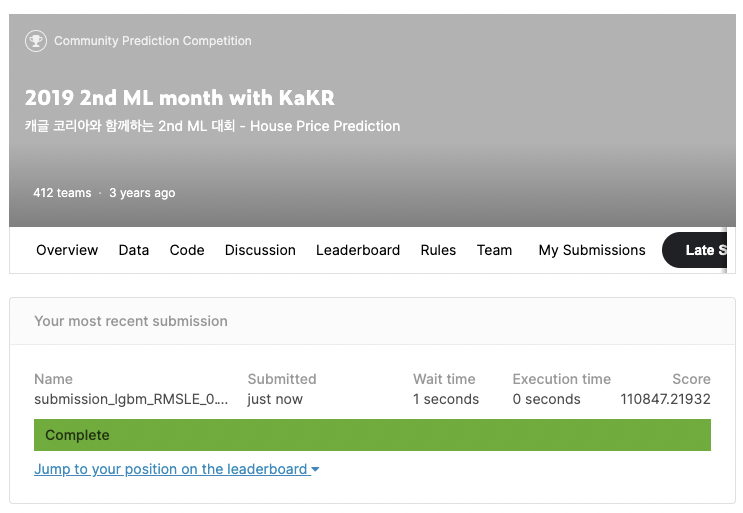   
ÌÅ¨Í≤å Îã¨ÎùºÏßÑÍ±¥ ÏóÜÏóàÎã§.

---

# 2Ï∞® ÏàòÏ†ï_ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ï†ïÌïòÍ∏∞

In [31]:
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=-1):
    # model Ï¥àÍ∏∞Ìôî
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                        cv=10, verbose=verbose, n_jobs=n_jobs)
    
    # fitting
    grid_model.fit(train, y)
    
    # params, score Í≤∞Í≥º Ï†ÄÏû•ÌïòÍ∏∞
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    # Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÎßåÎì§Í∏∞
    results = pd.DataFrame(params)
    results['score'] = score
    
    # RMSLE Í∞íÏùÑ Ï∂îÍ∞ÄÌïòÍ≥† Ï†ïÎ†¨
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')
    
    return results

In [32]:
# LGBMRegressor
lgb_params = {
    'n_estimators' : [800, 1600],
    'learning_rate' : [0.1],
    'max_depth' : [-1],
    'num_leaves' : [8, 15]
}

lightgbm = LGBMRegressor(random_state=random_state)

my_GridSearch(lightgbm, train, y, lgb_params)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


learning_rate  max_depth  n_estimators  num_leaves     score     RMSLE
2            0.1         -1          1600           8 -0.025533  0.159790
1            0.1         -1           800          15 -0.025691  0.160284
0            0.1         -1           800           8 -0.025743  0.160447
3            0.1         -1          1600          15 -0.026150  0.161710

In [33]:
# Ï†ÅÏö©Ìïú ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ Ï†ÅÌï©ÏÑ± Î∞è rmse Ï†êÏàò ÌôïÏù∏
check_lightgbm = LGBMRegressor(learning_rate=0.1, max_depth=-1, n_estimators=1600, num_leaves=8)

check_X_train, check_X_test, check_y_train, check_y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
check_lightgbm.fit(check_X_train, check_y_train)

print(check_lightgbm.score(check_X_train, check_y_train))
print(check_lightgbm.score(check_X_test, check_y_test))

y_pred = check_lightgbm.predict(check_X_test)
check_rmse = rmse(check_y_test, y_pred)
check_rmse

0.9605759885347183
0.9173365779365036


104413.46711271799

### target score 110000 Ïù¥ÌïòÏù¥ÎØÄÎ°ú Ï†úÏ∂úÌïòÍ∏∞!!

# Ï†ÄÏû•

In [34]:
def save_submission(model, train, y, test, model_name, rmsle):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    data_dir = os.getenv('HOME')+'/aiffel/AI_study/Exploration/E05_kaggle_house_price_prediction/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('save{}'.format(submission_csv_path))

In [35]:
save_submission(check_lightgbm, train, y, test, model_name='lgbm', rmsle='0.159790')

save/aiffel/aiffel/AI_study/Exploration/E05_kaggle_house_price_prediction/data/submission_lgbm_RMSLE_0.159790.csv


# Í≤∞Í≥º

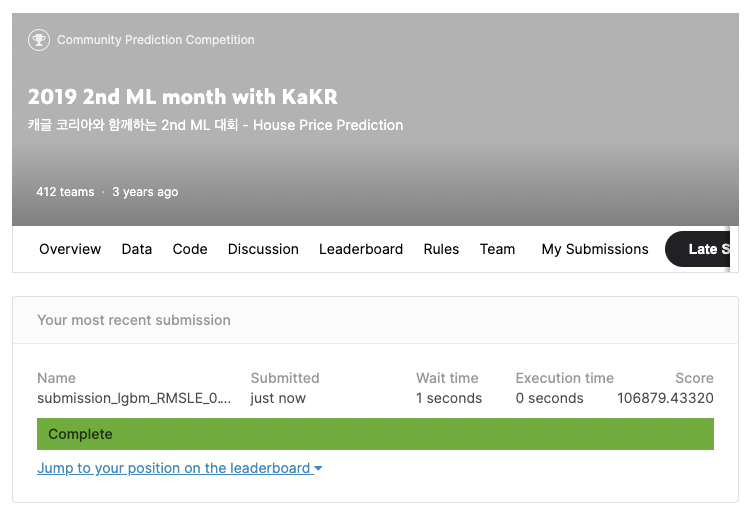   

Î™©Ìëú Ï†êÏàò 110000 Ïù¥Ìïò Îã¨ÏÑ±!

---

# ÌöåÍ≥†

Ï†úÍ≥µÎ∞õÏùÄ Îç∞Ïù¥ÌÑ∞Ïùò featureÎ•º Ï†ÑÏ≤òÎ¶¨ÌïòÎäî Í≥ºÏ†ïÏóêÏÑú priceÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÌôïÏù∏ Î™ªÌïúÍ≤å ÏïÑÏâΩÎã§.   
ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÌôïÏù∏Ìïú Îí§ priceÏóê ÏòÅÌñ•ÏùÑ Ï£ºÎäî Îç∞Ïù¥ÌÑ∞Îì§Îßå ÎΩëÏïÑÎÇ¥ÏÑú Î™®Îç∏ ÌïôÏäµÏùÑ ÏßÑÌñâÌñàÎã§Î©¥ Í≤∞Í≥ºÍ∞Ä Îçî Ï†ïÌôïÌïòÏßÄ ÏïäÏïòÏùÑÍπå Ïã∂Îã§.   
ÏúÑÏóê Î∂ÄÏ°±Ìïú Ï†êÏùÑ Ï∂îÍ∞ÄÌïòÎ†§Í≥† Îã§Î•∏ ÏûëÏóÖÎ¨ºÏùÑ Î≥¥Î©¥ÏÑú ÌïòÎã§Í∞Ä dataÏôÄ subÎ•º concatÌïòÏßÄ ÏïäÍ≥† ÏßÑÌñâÌñàÍ≥† ÏΩîÎìúÎ∏îÎü≠Îì§ÏùÑ ÏúÑ, ÏïÑÎûò ÏÑûÎäî Í≥ºÏ†ïÏóêÏÑú Í≤∞Í≥ºÎ¨ºÏù¥ ÎßéÏù¥ Íº¨ÏòÄÏùåÏùÑ ÌôïÏù∏ÌñàÎã§. Í∑∏ÎûòÏÑú Ï≤òÏùåÎ∂ÄÌÑ∞ Îã§Ïãú ÏûëÏÑ±ÌïòÎ©¥ÏÑú ÎêòÎèåÏïÑÎ≥¥Í∏∞Î°ú Í≤∞Ï†ïÌñàÎã§. ~~2022.01.23 1Ï∞® ÏóéÍ∏∞~~   

Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÌïòÎäî Í≥ºÏ†ïÏóêÏÑú `data['date'] = data['date'].apply(lambda x : str(x[:6])).astype(int)`Ïóê `int` ÎåÄÏã† `str`ÏùÑ ÎÑ£ÏóàÎã§Í∞Ä Î™®Îç∏ÎßÅ ÌïôÏäµÏùÑ Î™ªÌïòÎäî Ïò§Î•òÍ∞Ä Î∞úÏÉùÌñàÎã§. ÏßÄÍ∏àÏùÄ Ìï¥Í≤∞Ìï¥ÏÑú Îã§ÌñâÏù¥ÏßÄÎßå Í∞ÑÎã®Ìïú Î≤ÑÍ∑∏ Ïû°ÎäîÎç∞ ÏãúÍ∞ÑÏùÑ ÎßéÏù¥ ÏÇ¨Ïö©ÌñàÎã§. ü•≤   

Îã§Î•∏ ÏÇ¨ÎûåÎì§ÏùÄ Ïñ¥ÎñªÍ≤å ÏûëÏóÖÌñàÎäîÏßÄ Í∂ÅÍ∏àÌï¥ÏÑú Ï∫êÍ∏ÄÏùÑ ÌÜµÌï¥ ÏôÑÏÑ±Îêú ÏΩîÎìúÎ•º ÎßéÏù¥ Î¥§ÎäîÎç∞, ÌäπÌûà Í∏∞ÏñµÏóê ÎÇ®Îäî ÏûëÏóÖÎ¨ºÏùÄ ÏúÑÎèÑÏôÄ Í≤ΩÎèÑÎ•º Î∂ÑÏÑùÌï¥ÏÑú Ï¢ãÏùÄ ÌôòÍ≤ΩÏóê ÏûàÎäî ÎπÑÏãº ÏßëÏùÑ Î¨∂Ïñ¥ÏÑú ÌïôÏäµÏãúÌÇ§Îäî Î∂ÑÎèÑ Í≥ÑÏÖ®Îã§. featuresÎ•º Ïñ¥ÎñªÍ≤å Ìï¥ÏÑùÌïòÎÉêÏóê Îî∞ÎùºÏÑú Ï≤òÎ¶¨ Í≥ºÏ†ïÏù¥ ÏóÑÏ≤≠ Ï∞®Ïù¥ÎÇ† Ïàò ÏûàÏùåÏùÑ Íπ®Îã¨ÏïòÎã§. Í∑∏Î¶¨Í≥† ÎÇ¥Í∞Ä ÏßúÎçò ÏΩîÎìúÏôÄ ÎπÑÏä∑Ìïú Î∞©ÏãùÏúºÎ°ú ÌñàÏßÄÎßå Í∑∏Î∂ÑÏùò ÏΩîÎìúÏôÄ ÎÇòÏùò ÏΩîÎìúÎ•º Ìï©ÏπòÎäî ÏûëÏóÖÏù¥ Ïñ¥Î†§Ïõ†Îã§. ÏïÑÏßÅÎèÑ ÏΩîÎìú Ìï¥ÏÑùÍ≥º ÏΩîÎìúÎÅºÎ¶¨ Ï†ëÎ™©ÏãúÌÇ§Îäî Îä•Î†•Ïù¥ ÎßéÏù¥ Î∂ÄÏ°±Ìï®ÏùÑ ÎäêÍºàÎã§.

2022.01.23   
Score 110971Î°ú ÏïΩÍ∞ÑÏùò ÏàòÏ†ï ÏöîÎßù   

2022.01.24   
1Ï∞® ÏàòÏ†ï ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÏàòÏ†ïÌï¥ÏÑú Ï†úÏ∂ú Score 110847   
2Ï∞® ÏàòÏ†ï rmseÍ∞Ä ÏµúÎåÄÌïú ÎÇÆÏùÄ ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ìï© ÎßåÎì§Ïñ¥ÏÑú Ï†úÏ∂ú Score 106879 __Î™©Ìëú Ï†êÏàò Îã¨ÏÑ± ÏôÑÎ£å__   